In [64]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [2]:
df= pd.read_csv('Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
# concatnate all csv files into one mail csv files

files = [file for file in os.listdir('Sales_Data/')]

fulldf = pd.DataFrame()

for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    fulldf = pd.concat([fulldf,df])

fulldf.to_csv('all_data.csv',index=False)

In [4]:
fulldf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Cleaning up the data

In [5]:
nandf = fulldf[fulldf.isna().any(axis=1)]
nandf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# dropping all NAN values

fulldf = fulldf.dropna(how = 'all')
fulldf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Cleaning up the OR error

In [7]:
tempdf = fulldf[fulldf['Order Date'].str[0:2] == 'Or']

fulldf = fulldf[fulldf['Order Date'].str[0:2]!='Or']

converting the columns to correct dtypes

In [8]:
fulldf['Quantity Ordered'] = pd.to_numeric(fulldf['Quantity Ordered'])
fulldf['Price Each'] = pd.to_numeric(fulldf['Price Each'])

# finding whats the best sales month is and how much is earned during that month

In [9]:
# augmenting data - breaking up order_date column and 
# creating a month column

fulldf.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [10]:
# extracting the month from Order Date and coverting dtype to str
fulldf['Month'] = fulldf['Order Date'].str[0:2]
fulldf['Month'] = fulldf['Month'].astype('int32')

In [11]:
fulldf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
#adding another column for total sales column

fulldf['Total_Sales'] = fulldf['Quantity Ordered']*fulldf['Price Each']
fulldf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Finding the best month for sales, and how much was earned each month

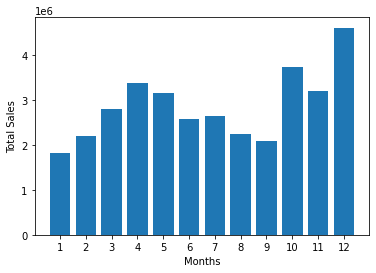

In [13]:
fulldf.groupby('Month').sum()
tsales = fulldf.groupby('Month').sum()
#graphing
months = range (1,13)

plt.bar(months,tsales['Total_Sales'])
plt.xticks(months)
plt.ylabel('Total Sales')
plt.xlabel('Months')
plt.show()

What city had the best sales 

In [14]:
fulldf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [15]:
# creating a CITY column and extracting City from the Purchase Address

def get_city(address):
    return address.split(',')[1]

# extracting state and ignoring zipcode from the address

def get_state(address):
    return address.split(',')[2].split(' ')[1]

fulldf['City'] = fulldf['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
fulldf.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [17]:
bestmonth = fulldf.groupby('City').sum()

In [18]:
bestmonth

,Quantity Ordered,Price Each,Month,Total_Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


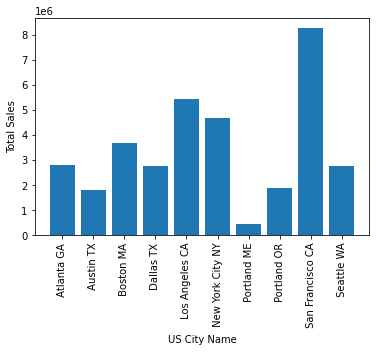

In [20]:
#graphing
months = range (1,13)

cities = [city for city, df in fulldf.groupby('City')]

plt.bar(cities,bestmonth['Total_Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.ylabel('Total Sales')
plt.xlabel('US City Name')
plt.show()

What is the best time to run ads for maximize the likelihood of a customer placing an order

In [21]:
fulldf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [22]:
# using DATE TIME library converting order date to datetime format

fulldf['Order Date'] = pd.to_datetime(fulldf['Order Date'])

In [23]:
fulldf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [28]:
# extracting the hour from the order date

def ext_hour(hr):
    return  hr.hour

def ext_min(mn):
    return mn.minute

fulldf['Hour'] = fulldf['Order Date'].apply(ext_hour)

fulldf['Min'] = fulldf['Order Date'].apply(ext_min)

In [37]:
fulldf['Hour'] = fulldf['Order Date'].dt.hour
fulldf['Minute'] = fulldf['Order Date'].dt.minute
del fulldf['Min']

In [38]:
fulldf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


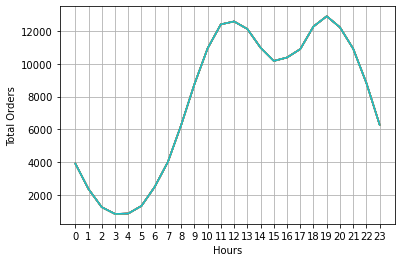

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [48]:
hours = [hour for hour, df in fulldf.groupby('Hour')]
plt.plot(hours, fulldf.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Total Orders')
plt.grid()
plt.show()
fulldf.groupby(['Hour']).count()

WHAT PRODUCTS ARE OFTEN SOLD TOGETHER

In [57]:
fulldf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [58]:
# checking for similar order_ID's 
# creating a new DF to check duplicate Order_ID's

orderdf = fulldf[fulldf['Order ID'].duplicated(keep=False)]
orderdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31


In [59]:
# bringing all products under one order_id on one line

orderdf['Grouped_Orders'] = orderdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-59-02ee22b116b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderdf['Grouped_Orders'] = orderdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [60]:
orderdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City,Hour,Minute,Grouped_Orders
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [63]:
# since there are duplicate orders. Therefore filtering duplicates

orderdf = orderdf[['Order ID','Grouped_Orders']].drop_duplicates()
orderdf.head()

,Order ID,Grouped_Orders
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [74]:
# finding whats the most commonly bought together

count = Counter()

for row in orderdf['Grouped_Orders']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) # number designates the amount of items bought together. change accordingly

# correcting the formatting

for key, value in count.most_common(5):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


WHAT PRODUCTS SOLD THE MOST AND WHY

In [75]:
fulldf.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30


In [80]:
# suming up the itesm sold and grouping them

prod_group = fulldf.groupby('Product')
quant_ordered = prod_group.sum()['Quantity Ordered']

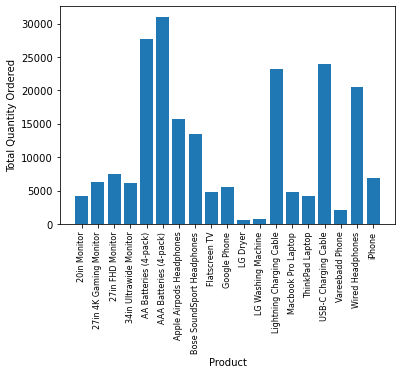

In [82]:
# visualizing results

producs = [product for product, df in prod_group]

plt.bar(producs, quant_ordered)
plt.xticks(producs, rotation='vertical',size=8)
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.show()


In [83]:
# AAA and AA batteries are the most sold
# lightning cabels were next 

# amount of itesm sold on these will probably due to the low prices on these? compared 
# to the prices of dryers and washing machines

In [85]:
# overlaying prices vs quantity ordered

prices = fulldf.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-98-e2b7a61f2563>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(producs,rotation='vertical',size=8)


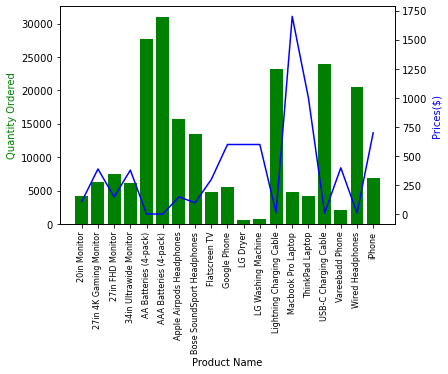

In [98]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(producs, quant_ordered, color='g')
ax2.plot(producs,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Prices($)',color='b')
ax1.set_xticklabels(producs,rotation='vertical',size=8)
plt.show()

In [ ]:
# the discrepences can be explained by looking at demand and supply.